# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#generate a URL for the API query
url="http://api.openweathermap.org/data/2.5/weather?&appid=" #set the initial api url equal to variable "url"

city_info=[] #creates an empty list for all information about the city

#gather all information for each city in the list of cities
for city in cities:
    
    full_url=url+weather_api_key+"&q="+city #create a new api pull for each city in the cities list
    try: #if the city appears in the api call
        weather_pull=requests.get(full_url).json() #assign the new json to the weather_pull variable
    
        #pull out relevant info out of JSON
        name=weather_pull["name"] #pull the city name and assign to the city variable
        long=weather_pull["coord"]["lon"] #pull the longitude for the city and assign to the long variable
        lat=weather_pull["coord"]["lat"] #pull the latitude for the city and assign to the lat variable
        max_temp=((weather_pull["main"]["temp_max"])-273.15)*1.8+32 #pull the max temp for the city, convert from Kelvin to Farenheit and assign to the max temp variable
        humidity=weather_pull["main"]["humidity"] #pull the city's humidity and assign to the humidity variable
        clouds=weather_pull["clouds"]["all"] #pull the city's cloudiness and assign to the clouds variable
        wind_speed=weather_pull["wind"]["speed"] #pull the city's wind speed and assig to the wind speed variable
        country=weather_pull["sys"]["country"] #pull the city's country and assign to the country variable
        date=weather_pull["dt"] #pull the date of the JSON and assign to the date variable
    
        city_dic={
            "City": name,
            "Lat": lat,
            "Lng": long,
            "Max Temp": max_temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": wind_speed,
            "Country": country,
            "Date": date
        } #create a dictionary with the infor for each city
    
        city_info.append(city_dic) #add the city dictionary to the empty list
    except: #if the city doesn't appear in the api call
        print("City not found") #print a message showing the city doesn't show up
        pass #continue with the for loop

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


In [24]:
city_info #display the list of city dictionaries

[{'City': 'Moba',
  'Lat': 33.2288,
  'Lng': 105.0179,
  'Max Temp': 36.14000000000002,
  'Humidity': 79,
  'Cloudiness': 89,
  'Wind Speed': 1.51,
  'Country': 'CN',
  'Date': 1611897950},
 {'City': 'Yerköy',
  'Lat': 39.6381,
  'Lng': 34.4672,
  'Max Temp': 29.75,
  'Humidity': 93,
  'Cloudiness': 83,
  'Wind Speed': 0.26,
  'Country': 'TR',
  'Date': 1611897954},
 {'City': 'Velizh',
  'Lat': 55.6056,
  'Lng': 31.1967,
  'Max Temp': 27.23000000000004,
  'Humidity': 99,
  'Cloudiness': 99,
  'Wind Speed': 1.65,
  'Country': 'RU',
  'Date': 1611897955},
 {'City': 'Oranjemund',
  'Lat': -28.55,
  'Lng': 16.4333,
  'Max Temp': 61.17800000000007,
  'Humidity': 80,
  'Cloudiness': 0,
  'Wind Speed': 7.28,
  'Country': 'NA',
  'Date': 1611897956},
 {'City': 'Cidreira',
  'Lat': -30.1811,
  'Lng': -50.2056,
  'Max Temp': 73.32800000000006,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 7.89,
  'Country': 'BR',
  'Date': 1611897959},
 {'City': 'Nantucket',
  'Lat': 41.2835,
  'Lng': -

In [26]:
#convert list into dataframe
df=pd.DataFrame(city_info)
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moba,33.2288,105.0179,36.140,79,89,1.51,CN,1611897950
1,Yerköy,39.6381,34.4672,29.750,93,83,0.26,TR,1611897954
2,Velizh,55.6056,31.1967,27.230,99,99,1.65,RU,1611897955
3,Oranjemund,-28.5500,16.4333,61.178,80,0,7.28,NA,1611897956
4,Cidreira,-30.1811,-50.2056,73.328,93,100,7.89,BR,1611897959
...,...,...,...,...,...,...,...,...,...
578,Robertsport,6.7533,-11.3686,78.890,85,1,2.50,LR,1611898426
579,Ladário,-19.0047,-57.6017,73.166,95,100,0.75,BR,1611898427
580,Sagamu,6.8432,3.6478,78.800,94,20,1.40,NG,1611898427
581,Hoquiam,46.9809,-123.8893,37.130,92,5,1.96,US,1611898428


In [20]:
#test out the json file pull from the API (STUD)
den_url=url+weather_api_key+"&q="+"Denver"
print(requests.get(den_url).json())

weather_pull=requests.get(den_url).json() #assign the json to the weather_pull variable (stud)

print(weather_pull)


#pull out relevant info out of JSON
city=weather_pull["name"]
long=weather_pull["coord"]["lon"] #pull the longitude for the city and assign to the long variable
lat=weather_pull["coord"]["lat"]
max_temp=((weather_pull["main"]["temp_max"])-273.15)*1.8+32
humidity=weather_pull["main"]["humidity"]
clouds=weather_pull["clouds"]["all"]
wind_speed=weather_pull["wind"]["speed"]
country=weather_pull["sys"]["country"]
date=weather_pull["dt"]

#create a dictionary of all key info into a dictionary for each city 
#create a list of all city dictionaries

city_dic={
    "City": city,
    "Lat": lat,
    "Lng": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
} #create a dictionary with the infor for each city
city_dic

#city_info.append(city_dic)

{'coord': {'lon': -104.9847, 'lat': 39.7392}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.47, 'feels_like': 270.44, 'temp_min': 273.15, 'temp_max': 275.93, 'pressure': 1015, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 2.55, 'deg': 213}, 'clouds': {'all': 100}, 'dt': 1611896587, 'sys': {'type': 3, 'id': 2011082, 'country': 'US', 'sunrise': 1611843065, 'sunset': 1611879278}, 'timezone': -25200, 'id': 5419384, 'name': 'Denver', 'cod': 200}
{'coord': {'lon': -104.9847, 'lat': 39.7392}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.47, 'feels_like': 270.44, 'temp_min': 273.15, 'temp_max': 275.93, 'pressure': 1015, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 2.55, 'deg': 213}, 'clouds': {'all': 100}, 'dt': 1611896587, 'sys': {'type': 3, 'id': 2011082, 'country': 'US', 'sunrise': 1611843065, 's

{'City': 'Denver',
 'Lat': 39.7392,
 'Lng': -104.9847,
 'Max Temp': 37.004000000000055,
 'Humidity': 79,
 'Cloudiness': 100,
 'Wind Speed': 2.55,
 'Country': 'US',
 'Date': 1611896587}

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
#save as a csv file
df.to_csv("Weather_data.csv", encoding="utf-8", index=False)

In [30]:
weather_df=pd.read_csv("Weather_data.csv") #read the created csv file to ensure the file is created
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moba,33.2288,105.0179,36.140,79,89,1.51,CN,1611897950
1,Yerköy,39.6381,34.4672,29.750,93,83,0.26,TR,1611897954
2,Velizh,55.6056,31.1967,27.230,99,99,1.65,RU,1611897955
3,Oranjemund,-28.5500,16.4333,61.178,80,0,7.28,NaN,1611897956
4,Cidreira,-30.1811,-50.2056,73.328,93,100,7.89,BR,1611897959
...,...,...,...,...,...,...,...,...,...
578,Robertsport,6.7533,-11.3686,78.890,85,1,2.50,LR,1611898426
579,Ladário,-19.0047,-57.6017,73.166,95,100,0.75,BR,1611898427
580,Sagamu,6.8432,3.6478,78.800,94,20,1.40,NG,1611898427
581,Hoquiam,46.9809,-123.8893,37.130,92,5,1.96,US,1611898428


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [48]:
#get summary statistics for the dataframe
weather_quart=weather_df.quantile([.25, .5, .75]) #find the quantiles of the dataframe

weather_sum=weather_df.agg(["count", "mean", "std", "min", "max"]) #aggregate the dataframe to find the summary stats

full_sum=weather_sum.append(weather_quart) #add the quantiles to the dataframe
full_sum

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,577.0,5.830000e+02
min,Aban,-54.800000,-179.166700,-49.360000,15.000000,0.000000,0.020000,NaN,1.611898e+09
max,Øksfjord,78.218600,178.416700,98.600000,100.000000,100.000000,18.120000,NaN,1.611898e+09
mean,NaN,19.808833,17.921626,48.862480,73.900515,55.404803,3.839846,NaN,1.611898e+09
std,NaN,33.547405,91.226956,33.019425,19.025134,39.407390,2.755131,NaN,9.683145e+01
0.25,NaN,-8.512700,-63.027250,26.654000,64.000000,16.500000,1.650000,NaN,1.611898e+09
0.5,NaN,22.233300,20.225100,59.162000,79.000000,69.000000,3.090000,NaN,1.611898e+09
0.75,NaN,47.904200,102.016100,75.398000,88.000000,96.000000,5.275000,NaN,1.611898e+09


In [54]:
weather_sum_df=full_sum.drop(["City", "Country"], axis=1) #drop the city and country columns from the dataframe
weather_sum_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
min,-54.800000,-179.166700,-49.360000,15.000000,0.000000,0.020000,1.611898e+09
max,78.218600,178.416700,98.600000,100.000000,100.000000,18.120000,1.611898e+09
mean,19.808833,17.921626,48.862480,73.900515,55.404803,3.839846,1.611898e+09
std,33.547405,91.226956,33.019425,19.025134,39.407390,2.755131,9.683145e+01
0.25,-8.512700,-63.027250,26.654000,64.000000,16.500000,1.650000,1.611898e+09
0.5,22.233300,20.225100,59.162000,79.000000,69.000000,3.090000,1.611898e+09
0.75,47.904200,102.016100,75.398000,88.000000,96.000000,5.275000,1.611898e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
#determine if any cities have a humidity >100%
weather_df.sort_values(by="Humidity", ascending=False) #sort through the weather dataframe to get the humidity levels of each city

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
546,Liezen,47.5667,14.2333,33.998,100,75,1.54,AT,1611898421
9,Batelov,49.3143,15.3947,33.008,100,100,1.88,CZ,1611897985
237,La Palma,33.8464,-118.0467,55.400,100,90,9.77,US,1611898326
57,Kozluk,38.1938,41.4885,39.200,100,75,3.09,TR,1611898318
568,Oga,46.4631,10.3470,42.008,100,75,1.03,IT,1611898425
...,...,...,...,...,...,...,...,...,...
347,Raja,8.4596,25.6780,72.050,19,52,3.75,SS,1611898380
422,Bhuj,23.2667,69.6667,74.606,19,0,5.43,IN,1611898394
178,Upleta,21.7333,70.2833,78.638,17,0,6.02,IN,1611898344
37,Gogrial,8.5332,28.1004,77.396,16,68,3.46,SS,1611898314


In [ ]:
#no cities with humidity over 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature')

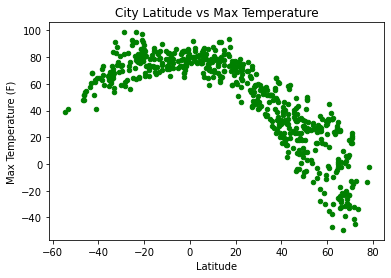

In [66]:
#create a scatter plot of latitude vs temperature
weather_df.plot.scatter(x="Lat", y="Max Temp", c="Green") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")

In [ ]:
#the graph above shows the nature of the city's latitude vs the max temperature. It appears as though, the closer the city is to the equator, the higher the max temparture of this city. This makes sense since cities closer to the equator tend to have the most consistent sunlight year round

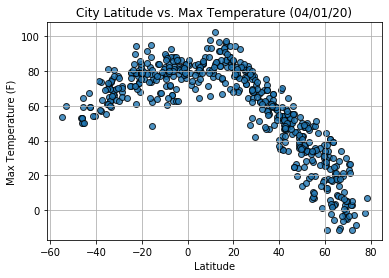

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs Humidity')

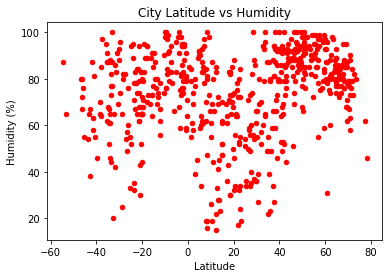

In [70]:
#create a scatter plot of latitude vs humidity
weather_df.plot.scatter(x="Lat", y="Humidity", c="Red") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

In [ ]:
#The relationship between a city's latitude and the city's humidity levels don't seem to have a significant correlation. Although I wouldn't say that latitude has a direct relationship with the city's humidity, there seems to be a small cluster of cities near the top of the norther hemisphere so one particular region does seem to have a significant amount of humidity.

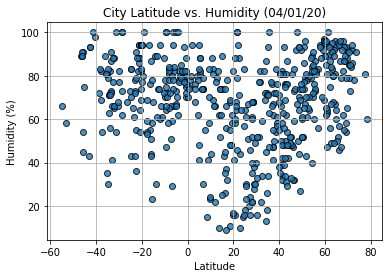

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness')

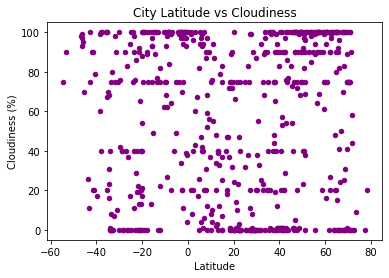

In [69]:
#create a scatter plot of latitude vs cloudiness
weather_df.plot.scatter(x="Lat", y="Cloudiness", c="Purple") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

In [ ]:
#cloudiness vs city latitude does not seem to have any correlation whatsoever as the spread of cloudiness appears to be equal across latitudes. No matter where a city is located in relation to the equator, the cities' cloudiness could be 100% or 0% equally.

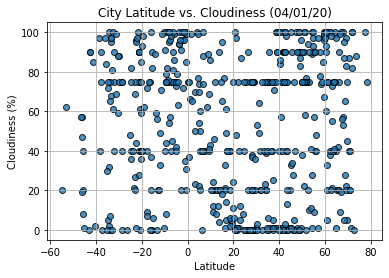

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed')

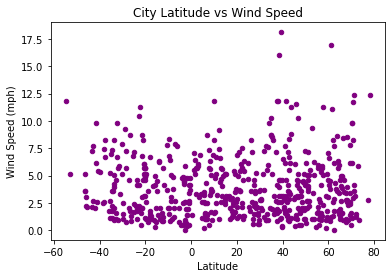

In [72]:
#create a scatter plot of latitude vs Wind Speed
weather_df.plot.scatter(x="Lat", y="Wind Speed", c="Purple") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")

In [ ]:
#A city's latitude does not seem to impact the city's average windspeed. It does seem that the higher up in the northern hemisphere a city is located, the more variety in the city's speed. Other traits of the city are more likely to drive the city's windspeed.

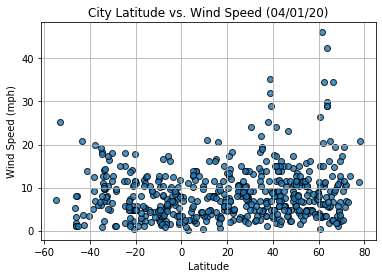

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [76]:
#filter the dataframe to only include cities in the northern hemisphere
north_df=weather_df.loc[weather_df["Lat"]>0] #filter the city dataframe to only include cities with a latitude > 0
north_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moba,33.2288,105.0179,36.140,79,89,1.51,CN,1611897950
1,Yerköy,39.6381,34.4672,29.750,93,83,0.26,TR,1611897954
2,Velizh,55.6056,31.1967,27.230,99,99,1.65,RU,1611897955
5,Nantucket,41.2835,-70.0995,23.000,68,90,11.83,US,1611897693
6,Asău,46.4333,26.4000,32.000,69,0,3.09,RO,1611897971
...,...,...,...,...,...,...,...,...,...
577,Wenling,28.3669,121.3600,46.148,56,0,5.19,CN,1611898426
578,Robertsport,6.7533,-11.3686,78.890,85,1,2.50,LR,1611898426
580,Sagamu,6.8432,3.6478,78.800,94,20,1.40,NG,1611898427
581,Hoquiam,46.9809,-123.8893,37.130,92,5,1.96,US,1611898428


The r-value is: -0.8823957279634671


Text(6, 10, 'y = -1.43x + 92.87')

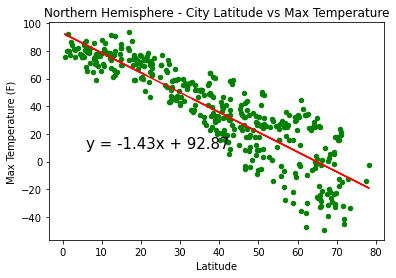

In [84]:
#create a scatter plot showing max temp vs Latitude
north_df.plot.scatter(x="Lat", y="Max Temp", c="Green") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - City Latitude vs Max Temperature")

x_values=north_df["Lat"] #set the city's latitude as the x values
y_values=north_df["Max Temp"] #set the city's max temp as the y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #finds the key regression values for the linear regression
regress_values = x_values * slope + intercept #find the values onlong the linear regression equasion at each datapoint in the dataframe
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #find the linear regression equasion for the dataframe

print(f"The r-value is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="Black")

The r-value is: 0.46937863826630627


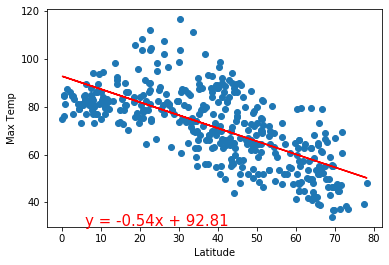

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [85]:
#filter the dataframe to only include cities in the southern hemisphere
south_df=weather_df.loc[weather_df["Lat"]<0] #filter the city dataframe to only include cities with a latitude > 0
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Oranjemund,-28.5500,16.4333,61.178,80,0,7.28,NaN,1611897956
4,Cidreira,-30.1811,-50.2056,73.328,93,100,7.89,BR,1611897959
8,Ushuaia,-54.8000,-68.3000,39.200,87,75,11.83,AR,1611897985
14,Carnarvon,-24.8667,113.6333,91.400,52,0,7.20,AU,1611898310
16,Hithadhoo,-0.6000,73.0833,82.490,71,38,3.63,MV,1611898310
...,...,...,...,...,...,...,...,...,...
566,Nkhotakota,-12.9274,34.2961,79.484,72,100,0.88,MW,1611898425
571,Viedma,-40.8135,-62.9967,64.418,55,79,5.37,AR,1611898425
575,Barra do Garças,-15.8900,-52.2567,72.914,91,97,0.31,BR,1611898426
576,Kirakira,-10.4544,161.9205,78.908,90,100,7.79,SB,1611898426


The r-value is: 0.5432157818846758


Text(0, 50, 'y = 0.45x + 83.25')

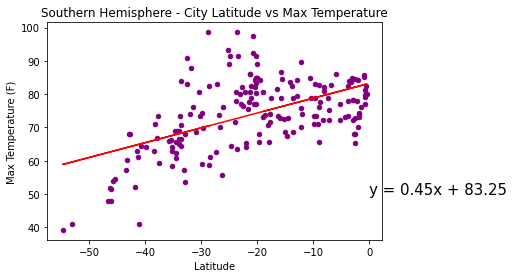

In [92]:
#create a scatter plot showing max temp vs Latitude
south_df.plot.scatter(x="Lat", y="Max Temp", c="Purple") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - City Latitude vs Max Temperature")

x_values=south_df["Lat"] #set the city's latitude as the x values
y_values=south_df["Max Temp"] #set the city's max temp as the y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #finds the key regression values for the linear regression
regress_values = x_values * slope + intercept #find the values onlong the linear regression equasion at each datapoint in the dataframe
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #find the linear regression equasion for the dataframe

print(f"The r-value is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="Black")

The r-value is: 0.6082708688906918


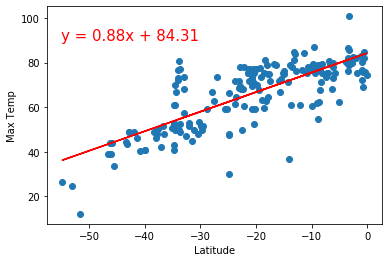

In [ ]:
#looking at the grapths above there appears to be a relatively strong correlation between the city's latitude and the city's max temperature (r=-.88 in the northern hemisphere and .54 in the southern hempisphere)
#The further away from the equator the colder the city's max temperature. It does appear that this relationship is more definite in the northern hemisphere than in the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4110564951859193


Text(0, 40, 'y = 0.4x + 57.76')

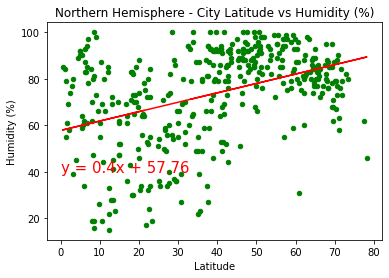

In [97]:
#create a scatter plot showing Humidity (%) vs Latitude
north_df.plot.scatter(x="Lat", y="Humidity", c="Green") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - City Latitude vs Humidity (%)")

x_values=north_df["Lat"] #set the city's latitude as the x values
y_values=north_df["Humidity"] #set the city's humidity as the y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #finds the key regression values for the linear regression
regress_values = x_values * slope + intercept #find the values onlong the linear regression equasion at each datapoint in the dataframe
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #find the linear regression equasion for the dataframe

print(f"The r-value is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="Red")

The r-value is: 0.000543987878808455


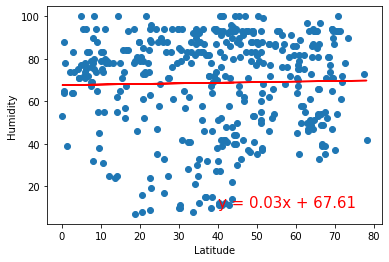

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.29511248967938736


Text(0, 30, 'y = 0.36x + 82.33')

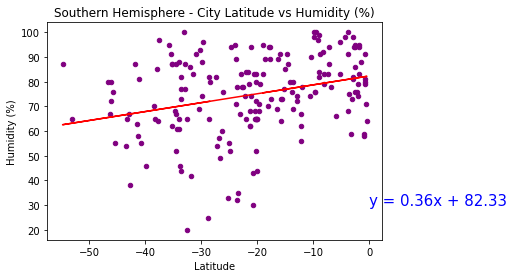

In [98]:
#create a scatter plot showing Humidity (%) vs Latitude
south_df.plot.scatter(x="Lat", y="Humidity", c="Purple") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - City Latitude vs Humidity (%)")

x_values=south_df["Lat"] #set the city's latitude as the x values
y_values=south_df["Humidity"] #set the city's humidity as the y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #finds the key regression values for the linear regression
regress_values = x_values * slope + intercept #find the values onlong the linear regression equasion at each datapoint in the dataframe
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #find the linear regression equasion for the dataframe

print(f"The r-value is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="Blue")

The r-value is: 0.014985174297345524


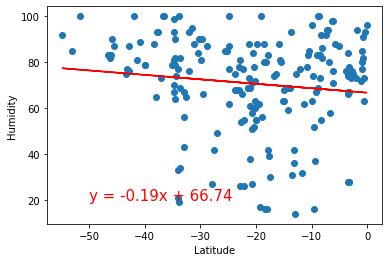

In [ ]:
#Although the r values for this relationship are relatively high (norther hemisphere: 0.41, southern hemisphere: 0.29), there isn't a strong enough correlation on either hemisphere to dictate that latitude leads to increased or decreased humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4110564951859193


Text(0, 40, 'y = 0.4x + 57.76')

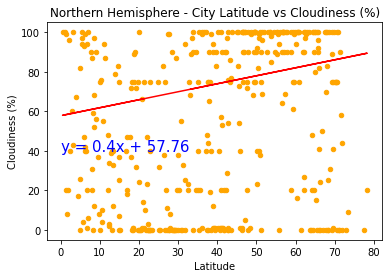

In [99]:
#create a scatter plot showing Cloudiness (%) vs Latitude
north_df.plot.scatter(x="Lat", y="Cloudiness", c="Orange") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - City Latitude vs Cloudiness (%)")

x_values=north_df["Lat"] #set the city's latitude as the x values
y_values=north_df["Humidity"] #set the city's cloudiness as the y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #finds the key regression values for the linear regression
regress_values = x_values * slope + intercept #find the values onlong the linear regression equasion at each datapoint in the dataframe
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #find the linear regression equasion for the dataframe

print(f"The r-value is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="Blue")

The r-value is: 0.0020898727664228514


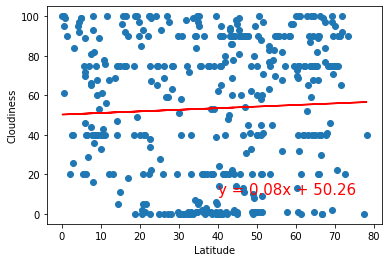

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29511248967938736


Text(0, 40, 'y = 0.36x + 82.33')

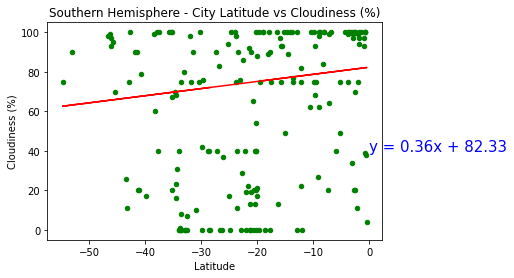

In [101]:
#create a scatter plot showing Cloudiness (%) vs Latitude
south_df.plot.scatter(x="Lat", y="Cloudiness", c="Green") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - City Latitude vs Cloudiness (%)")

x_values=south_df["Lat"] #set the city's latitude as the x values
y_values=south_df["Humidity"] #set the city's cloudiness as the y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #finds the key regression values for the linear regression
regress_values = x_values * slope + intercept #find the values onlong the linear regression equasion at each datapoint in the dataframe
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #find the linear regression equasion for the dataframe

print(f"The r-value is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="Blue")

The r-value is: 0.0035263772085582894


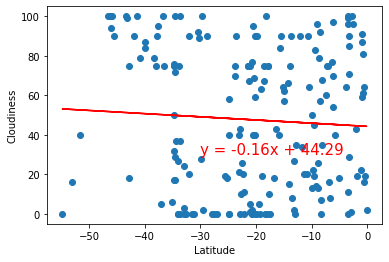

In [ ]:
#Once again, a low r value for the relationship between a city's latitude and cloudiness (0.41 and 0.29 for northern and southern hemisphere's respectively) reflects that city's latitude does not have a strong relationship in determining the city's cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.026077314444308438


Text(0, 40, 'y = 0.0x + 3.75')

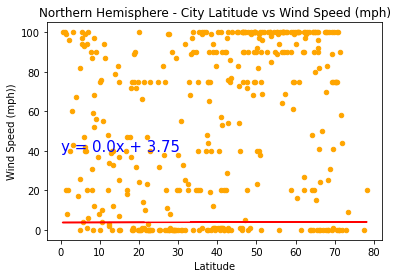

In [102]:
#create a scatter plot showing Wind Speed (mph) vs Latitude
north_df.plot.scatter(x="Lat", y="Cloudiness", c="Orange") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.title("Northern Hemisphere - City Latitude vs Wind Speed (mph)")

x_values=north_df["Lat"] #set the city's latitude as the x values
y_values=north_df["Wind Speed"] #set the city's wind speed as the y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #finds the key regression values for the linear regression
regress_values = x_values * slope + intercept #find the values onlong the linear regression equasion at each datapoint in the dataframe
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #find the linear regression equasion for the dataframe

print(f"The r-value is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="Blue")

The r-value is: 0.04019723576144484


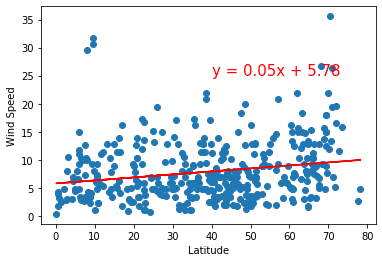

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2332122992536384


Text(0, 40, 'y = -0.04x + 2.79')

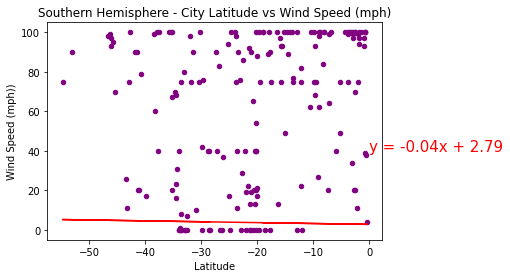

In [103]:
#create a scatter plot showing Wind Speed (mph) vs Latitude
south_df.plot.scatter(x="Lat", y="Cloudiness", c="Purple") #create a scatter plot using the weather dataframe
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.title("Southern Hemisphere - City Latitude vs Wind Speed (mph)")

x_values=south_df["Lat"] #set the city's latitude as the x values
y_values=south_df["Wind Speed"] #set the city's wind speed as the y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #finds the key regression values for the linear regression
regress_values = x_values * slope + intercept #find the values onlong the linear regression equasion at each datapoint in the dataframe
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #find the linear regression equasion for the dataframe

print(f"The r-value is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="Red")

The r-value is: 0.017128274759839232


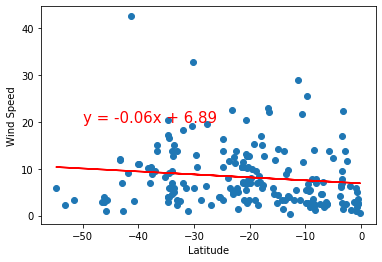

In [ ]:
#Once again, with such a low r value (.02 & .01 for Northern and Southern hemispheres respecitvely) there is no relationship between a city's latitude and it's wind speed.